In [1]:
import time

In [2]:
import torch
assert torch.rand(5, 3).round().max() == torch.tensor(1.)
print(torch.cuda.is_available())

True


In [3]:
"""
Sun Mar 13 16:34:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   51C    P5    29W / 175W |   7727MiB /  7959MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+

Sun Mar 13 21:18:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   47C    P8    21W / 175W |    868MiB /  7959MiB |     16%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
"""

def gpu_info():
    gpu_info = !nvidia-smi
    return '\n'.join(gpu_info)

In [11]:
#print(gpu_info())

In [5]:
# @title Setup

# @markdown Please execute this cell by pressing the _Play_ button
# @markdown on the left. You should only need to run this part once.

# @markdown **Note**: This installs the software on the Colab
# @markdown notebook in the cloud and not on your computer.

# %%capture
# this patch applied to fix torchtext dependency 11 Nov 2021
#!pip install torch==1.9.0+cu111 torchtext==0.10.0 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/


#!rm -Rf CLIP
!git clone https://github.com/openai/CLIP


#!rm -Rf taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
#!pip install taming-transformers

#!rm -Rf pixray
!git clone https://github.com/pixray/pixray
#!git clone https://github.com/dribnet/pixray
    
#!rm -Rf v-diffusion-pytorch
!git clone https://github.com/crowsonkb/v-diffusion-pytorch

    

#!pip install ftfy regex tqdm omegaconf pytorch-lightning
#!pip install kornia==0.6.1
#!pip install imageio-ffmpeg
#!pip install einops
#!pip install torch-optimizer
#!pip install easydict
#!pip install braceexpand
#!pip install git+https://github.com/pvigier/perlin-numpy
!mkdir -p steps
!mkdir -p models

#import sys
# sys.path.append("pixray")

fatal: destination path 'CLIP' already exists and is not an empty directory.
fatal: destination path 'taming-transformers' already exists and is not an empty directory.
fatal: destination path 'pixray' already exists and is not an empty directory.
fatal: destination path 'v-diffusion-pytorch' already exists and is not an empty directory.


In [6]:
!sed -i 's/from tokenizer/from simple_tokenizer/' ./pixray/slip.py
!sed -i 's/import utils//' ./pixray/slip.py

In [7]:
def ext_install():
    !pip install braceexpand
    !pip install omegaconf
    !pip install torch-optimizer
    !pip install git+https://github.com/pvigier/perlin-numpy
    !pip install colorthief
    
    !pip install ftfy
    !pip install git+https://github.com/openai/CLIP.git
    !pip install kornia
    !pip install einops
    !pip install pytorch-lightning
    !pip install resmem
#ext_install()

In [8]:
import sys
sys.path.append("pixray")
sys.path.append("v-diffusion-pytorch")
sys.path.append("CLIP/clip")

# Simple setup
#import pixray.pixray
#import pixray
import pixray

/nix/store/d97a5y39liyz3znsd73y7148m3pjg27j-python3.9-torchvision-0.11.3/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


--> Super resolution drawer not supported No module named 'basicsr'
--> Not running with fft support No module named 'aphantasia'
--> Not running with pydiffvg drawer support  No module named 'pydiffvg'


In [9]:
prompts = [
    'round color palette',
    'square color palette',
]

Using seed: 9597900177661134095
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Loaded CLIP RN50x4: 288x288 and 178.30M params
Loaded CLIP ViT-B/32: 224x224 and 151.28M params
Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['round color palette']


0it [00:00, ?it/s]

/nix/store/zbv01yslsk14jvq8kw64hiag6wxsw55m-python3.9-pytorch-1.10.2/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/nix/store/zbv01yslsk14jvq8kw64hiag6wxsw55m-python3.9-pytorch-1.10.2/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /build/source/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


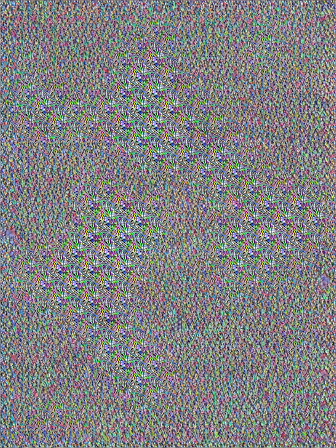

iter: 0, loss: 2.74, losses: 0.752, 0.0807, 0.88, 0.0612, 0.902, 0.0641 (-0=>2.74)
iter: 10, loss: 2.63, losses: 0.73, 0.0778, 0.856, 0.0612, 0.846, 0.0628 (-0=>2.633)
iter: 20, loss: 2.53, losses: 0.696, 0.0842, 0.814, 0.0667, 0.808, 0.0641 (-0=>2.532)
iter: 30, loss: 2.5, losses: 0.682, 0.0842, 0.803, 0.0625, 0.801, 0.0631 (-5=>2.477)
iter: 40, loss: 2.42, losses: 0.669, 0.0847, 0.776, 0.0662, 0.755, 0.0647 (-5=>2.41)
iter: 50, loss: 2.38, losses: 0.645, 0.0844, 0.774, 0.0678, 0.745, 0.0649 (-1=>2.373)
iter: 60, loss: 2.4, losses: 0.645, 0.0837, 0.774, 0.0669, 0.766, 0.0664 (-5=>2.344)
iter: 70, loss: 2.41, losses: 0.647, 0.0844, 0.779, 0.0658, 0.766, 0.0663 (-1=>2.336)
iter: 80, loss: 2.36, losses: 0.613, 0.0891, 0.778, 0.065, 0.752, 0.0624 (-1=>2.323)
iter: 90, loss: 2.35, losses: 0.612, 0.0854, 0.772, 0.0642, 0.749, 0.0634 (-9=>2.294)
iter: 100, loss: 2.34, losses: 0.625, 0.0854, 0.765, 0.0635, 0.74, 0.0646 (-9=>2.277)
iter: 110, loss: 2.25, losses: 0.602, 0.0848, 0.738, 0.0648, 0

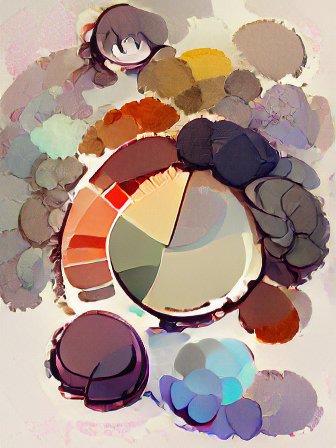

iter: 420, finished (-77=>2.15)
--- 404.1426146030426 seconds ---
Using seed: 7681036449811031365
reusing cached copy of model  models/vqgan_imagenet_f16_16384.ckpt
All CLIP models already loaded:  ['RN50x4', 'ViT-B/32', 'ViT-B/16']
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['square color palette']


0it [00:00, ?it/s]

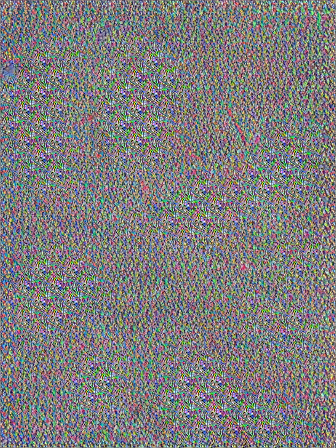

iter: 0, loss: 2.63, losses: 0.713, 0.0831, 0.864, 0.0631, 0.842, 0.0643 (-0=>2.629)
iter: 10, loss: 2.61, losses: 0.708, 0.0771, 0.868, 0.0613, 0.837, 0.0639 (-5=>2.589)
iter: 20, loss: 2.58, losses: 0.702, 0.0794, 0.849, 0.0615, 0.826, 0.0632 (-1=>2.568)
iter: 30, loss: 2.55, losses: 0.696, 0.0788, 0.832, 0.0607, 0.823, 0.0632 (-1=>2.531)
iter: 40, loss: 2.52, losses: 0.674, 0.0822, 0.825, 0.061, 0.81, 0.0644 (-1=>2.498)
iter: 50, loss: 2.46, losses: 0.663, 0.0818, 0.806, 0.0594, 0.786, 0.0622 (-0=>2.459)
iter: 60, loss: 2.46, losses: 0.665, 0.0814, 0.811, 0.0641, 0.779, 0.0632 (-5=>2.433)
iter: 70, loss: 2.46, losses: 0.663, 0.0832, 0.797, 0.0607, 0.795, 0.0629 (-15=>2.433)
iter: 80, loss: 2.4, losses: 0.647, 0.0819, 0.794, 0.0594, 0.753, 0.0642 (-0=>2.399)
iter: 90, loss: 2.42, losses: 0.651, 0.0818, 0.793, 0.0624, 0.765, 0.0619 (-3=>2.386)
iter: 100, loss: 2.38, losses: 0.651, 0.083, 0.775, 0.0628, 0.75, 0.0635 (-3=>2.374)
iter: 110, loss: 2.43, losses: 0.644, 0.0852, 0.786, 0.063

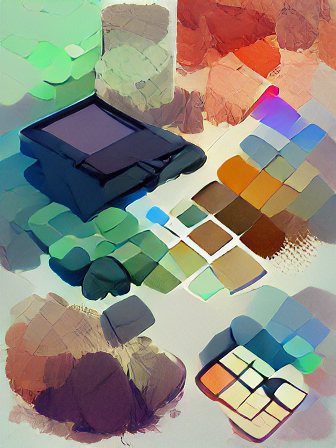

iter: 420, finished (-51=>2.22)
--- 385.7070634365082 seconds ---


In [10]:
# @title Settings

# @markdown Stop on this Iteration (Doc recomends 300, over 600 nothing happens)
iterations = 420  # @param {type:"number"}
# @markdown Display preview result every X frames
display_every = 84  # @param {type:"number"}
# @markdown Build an .mp4 with all frames
make_video = "No"  # @param ["Yes", "No"]
# @markdown Initial random image
init_noise = "snow"  # @param ["pixels", "gradient", "snow", "none"]
# @markdown Initial image can be empty or an URL
init_image = ""  # @param {type:"string"}
# @markdown Initial image and noise opacity (0 to 255)
init_image_alpha = 225  # @param {type:"number"}
# @markdown Quality + Aspect pre-determines size
quality = "best"  # @param ["draft", "normal", "better", "best"]
aspect = "square"  # @param ["widescreen", "portrait", "square"]
# @markdown Or override quality+aspect by setting a custom size
use_size = "Yes"  # @param ["Yes", "No"]
size_width = 350  # @param {type:"number"}
size_height = 450  # @param {type:"number"}

pixray.reset_settings()
pixray.add_settings(prompts=prompts, aspect=aspect, quality=quality)
pixray.add_settings(vector_prompts="textoff")
if use_size == "Yes":
    pixray.add_settings(size=[size_width, size_height])
pixray.add_settings(display_every=display_every)
pixray.add_settings(iterations=iterations)
pixray.add_settings(num_cuts=2)
pixray.add_settings(init_image=init_image)
pixray.add_settings(init_image_alpha=init_image_alpha)
pixray.add_settings(init_noise=init_noise)
if make_video == "Yes":
    pixray.add_settings(make_video=True)

for prompt in prompts:
    start_time = time.time()
    pixray.add_settings(prompts=prompt)
    pixray.add_settings(output=prompt + ".png")
    settings = pixray.apply_settings()
    pixray.do_init(settings)
    pixray.do_run(settings)
    print("--- %s seconds ---" % (time.time() - start_time))